# Seaborn Example

**Tutorial Docs:** https://seaborn.pydata.org/tutorial.html

In [1]:
import seaborn as sns

## Load Sample Data

In [2]:
%%time
# Load an example dataset with penguin data
penguins = sns.load_dataset("penguins")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Load the example flights dataset
flights = sns.load_dataset("flights")

# Load the example planets dataset
planets = sns.load_dataset("planets")

# Load the example tips dataset
tips = sns.load_dataset("tips")

CPU times: user 18.2 ms, sys: 2.25 ms, total: 20.4 ms
Wall time: 19.6 ms


## Scatterplot Matrix

**Ref:** https://seaborn.pydata.org/examples/scatterplot_matrix.html#scatterplot-matrix

In [3]:
# Preview data
penguins.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


### Based on Species

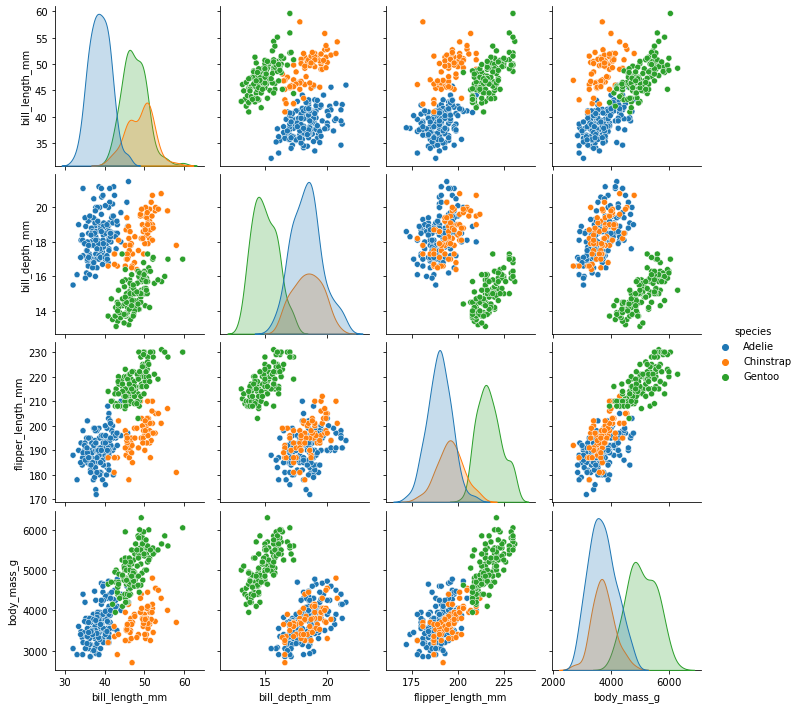

In [4]:
sns.pairplot(penguins, hue="species")

### Based on Island

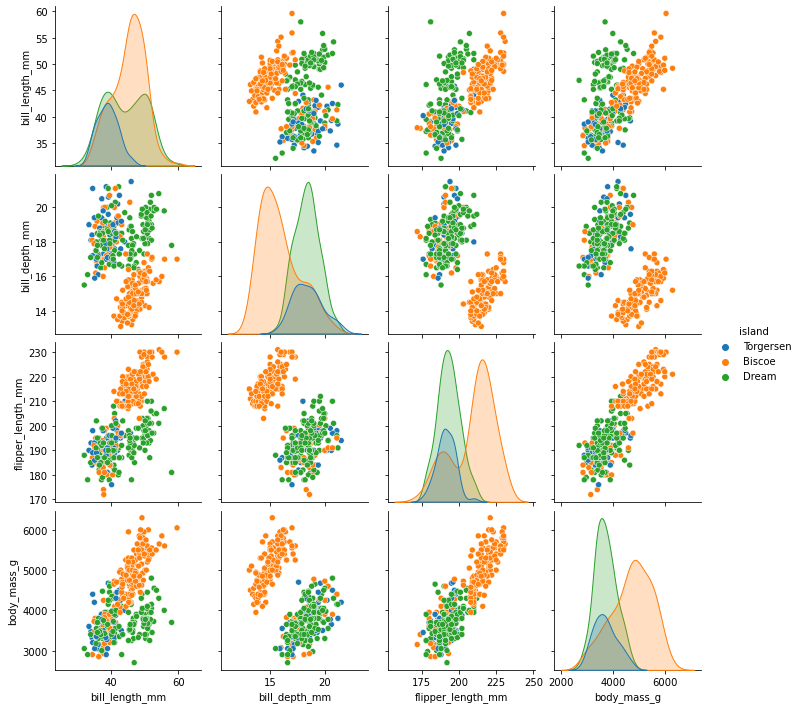

In [5]:
sns.pairplot(penguins, hue="island")

### Based on Sex

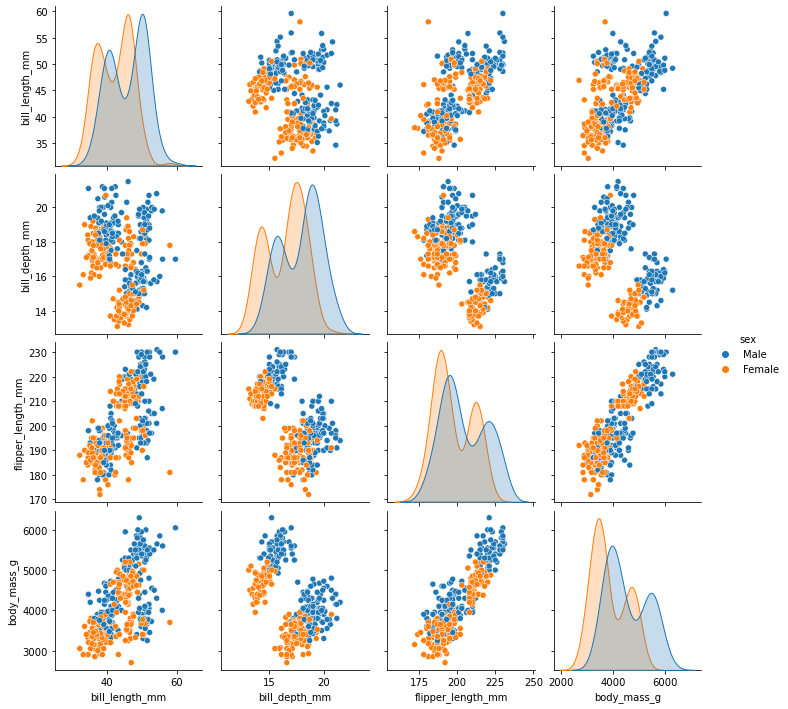

In [6]:
sns.pairplot(penguins, hue="sex")

## Timeseries plot with error bands
**Ref:** https://seaborn.pydata.org/examples/errorband_lineplots.html#timeseries-plot-with-error-bands

In [7]:
# Preview data
fmri.head(3)

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033


<AxesSubplot:xlabel='timepoint', ylabel='signal'>

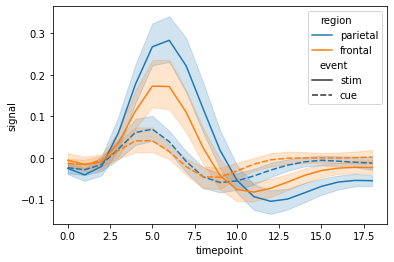

In [8]:
# Plot the responses for different events and regions
sns.lineplot(
    x="timepoint", 
    y="signal",
    hue="region", 
    style="event",
    data=fmri
)

## Small multiple time series

**Ref:** https://seaborn.pydata.org/examples/timeseries_facets.html#small-multiple-time-series

In [9]:
# Preview data
flights.head(3)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132


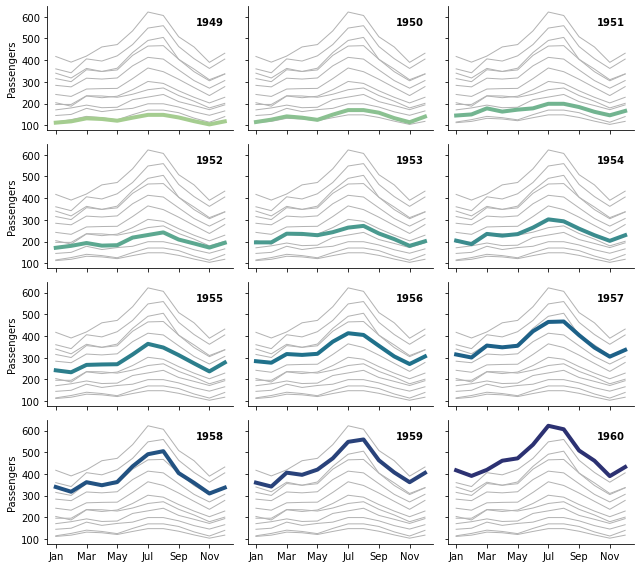

In [10]:
# Plot each year's time series in its own facet
g = sns.relplot(
    data=flights,
    x="month", y="passengers", col="year", hue="year",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)

# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=flights, x="month", y="passengers", units="year",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "Passengers")
g.tight_layout()

## Horizontal boxplot with observations

**Ref:** https://seaborn.pydata.org/examples/horizontal_boxplot.html#horizontal-boxplot-with-observations

In [11]:
import matplotlib.pyplot as plt

In [12]:
# Preview data
planets.head(3)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011


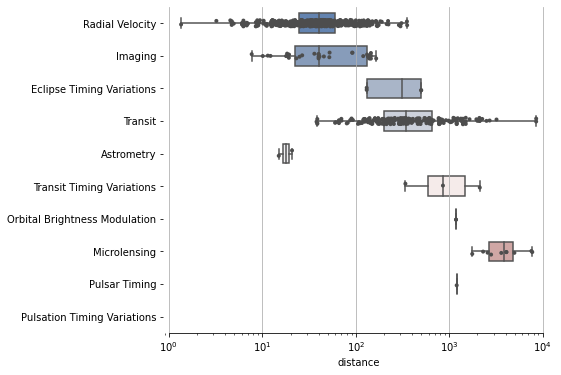

In [13]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="distance", y="method", data=planets,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="distance", y="method", data=planets,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

## Linear regression with marginal distributions

**Ref:** https://seaborn.pydata.org/examples/regression_marginals.html#linear-regression-with-marginal-distributions

In [14]:
# Preview data
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


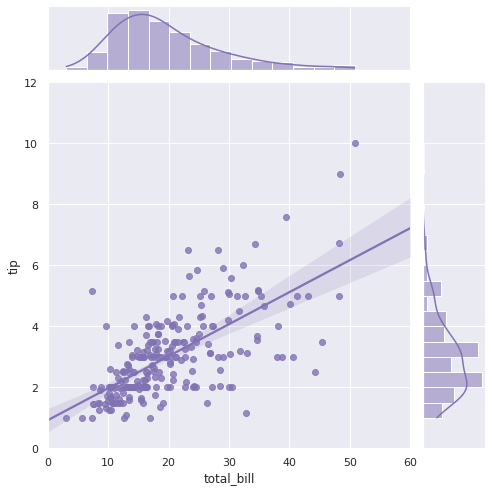

In [15]:
sns.set_theme(style="darkgrid")
g = sns.jointplot(
    x="total_bill", 
    y="tip", 
    data=tips,
    kind="reg",
    truncate=False,
    xlim=(0, 60),
    ylim=(0, 12),
    color="m", 
    height=7
)

# ...and many more Examples on the site!

https://seaborn.pydata.org/examples/index.html